In [1]:
from product_sub.infrastructure.dataset_builder import DatasetBuilder
from product_sub.domain.data_cleaning import NumImputer, CatImputer
from product_sub.domain.feature_selector import FeatureSelector
import product_sub.settings as stg

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline as Pipeline_sickit,  make_pipeline, make_union
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

In [2]:
RANDOM_STATE=42

In [3]:
dataset_merged = DatasetBuilder(
    filename_bank="data.csv", filename_socio="socio_eco.csv"
).merge()
dataset_merged = dataset_merged.drop(columns=stg.COL_RAW_DATE)
X = dataset_merged.drop(columns=stg.COL_RAW_SUBSCRIPTION)
y = dataset_merged[stg.COL_RAW_SUBSCRIPTION].values

In [4]:
numeric_transformer = Pipeline_sickit(steps=[
    ('num_imputer', NumImputer()),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline_sickit(steps=[
    ('cat_imputer', CatImputer(['JOB_TYPE', 'EDUCATION']) ),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])
clf = Pipeline_sickit(steps=[ ('preprocessor' , preprocessor),
                           ('classifier',  LogisticRegression()) ])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


X_train = preprocessor.fit_transform(X_train)
oversample = SMOTE()
smt = SMOTE(random_state=RANDOM_STATE)
pipeline_smt = Pipeline([('smt', smt), ('model',  GradientBoostingClassifier())])
test = pipeline_smt.fit(X_train, y_train)
#gradient_pipe = full_pipe.fit(X_train, y_train)





/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


TypeError: 'NoneType' object is not iterable

In [88]:
dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45136 entries, 0 to 45135
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        45136 non-null  int64  
 1   JOB_TYPE                   44850 non-null  object 
 2   STATUS                     44008 non-null  object 
 3   EDUCATION                  43283 non-null  object 
 4   HAS_DEFAULT                45136 non-null  int64  
 5   BALANCE                    45136 non-null  int64  
 6   HAS_HOUSING_LOAN           45136 non-null  int64  
 7   HAS_PERSO_LOAN             43782 non-null  float64
 8   CONTACT                    32117 non-null  object 
 9   DURATION_CONTACT           45136 non-null  int64  
 10  NB_CONTACT                 45136 non-null  int64  
 11  NB_DAY_LAST_CONTACT        45136 non-null  int64  
 12  NB_CONTACT_LAST_CAMPAIGN   45136 non-null  int64  
 13  RESULT_LAST_CAMPAIGN       8197 non-null   obj

In [79]:
X_test = cat_and_num_pipe.fit_transform(X_test)

In [80]:
y_hat = pipeline_smt.predict(X_test)

In [81]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      7961
           1       0.28      0.95      0.43      1067

    accuracy                           0.71      9028
   macro avg       0.64      0.81      0.62      9028
weighted avg       0.91      0.71      0.76      9028



In [83]:
dir(pipeline_smt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_transform',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_re

In [30]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1)
}

In [31]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()


d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean]}

result_df = pd.DataFrame(data=d)

/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

In [32]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.853565
1,SVC,0.889888
2,KNN,0.908746
3,Dec Tree,0.909467
4,Grad B CLF,0.914323
5,Rand FC,0.942344
6,Neural Classifier,0.867897


In [33]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

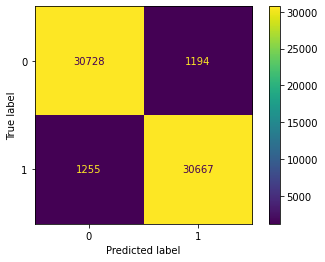

In [34]:
y_pred = xgb_model.predict(X_train)
plot_confusion_matrix(xgb_model,X_train, y_train)


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150), 
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=150, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 14.0min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1328e1be0>,
                                        'max_depth': <s

In [38]:
def print_scores_xgb(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Model with rank: 1
Mean validation score: 0.911 (std: 0.003)
Parameters: {'colsample_bytree': 0.8345272428958741, 'gamma': 0.49722873130541034, 'learning_rate': 0.0827775758032036, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.7975574860733738}

In [39]:
print_scores_xgb(search.cv_results_, 3)


Model with rank: 1
Mean validation score: 0.920 (std: 0.027)
Parameters: {'colsample_bytree': 0.8873062144401379, 'gamma': 0.147816842918857, 'learning_rate': 0.06164827794908118, 'max_depth': 5, 'n_estimators': 127, 'subsample': 0.6873761748867334}

Model with rank: 2
Mean validation score: 0.920 (std: 0.048)
Parameters: {'colsample_bytree': 0.7762490947209216, 'gamma': 0.14764529420946937, 'learning_rate': 0.12676522927158015, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.6546485325768115}

Model with rank: 3
Mean validation score: 0.920 (std: 0.040)
Parameters: {'colsample_bytree': 0.9987494125088112, 'gamma': 0.3484625279319074, 'learning_rate': 0.14526054941376598, 'max_depth': 4, 'n_estimators': 110, 'subsample': 0.7123852758368922}



In [40]:
xgb_model = xgb.XGBClassifier(colsample_bytree= 0.8873062144401379, gamma= 0.147816842918857, learning_rate= 0.06164827794908118,
 max_depth= 5, n_estimators= 127, subsample= 0.6873761748867334)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8873062144401379,
              gamma=0.147816842918857, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.06164827794908118,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=127, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6873761748867334,
              tree_method='exact', validate_parameters=1, verbosity=None)

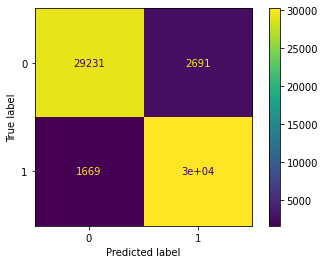

In [41]:
y_pred = xgb_model.predict(X_train)
plot_confusion_matrix(xgb_model,X_train, y_train)

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

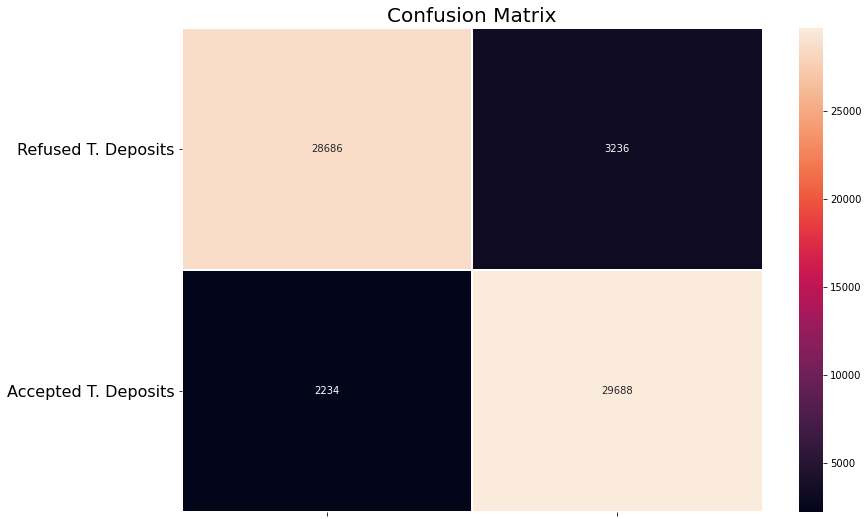

In [43]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [44]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred))

print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.9017130360831005
Recall Score:  0.9300169162333187


In [45]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.9156463004657188

In [46]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="predict_proba")

/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

In [47]:
y_scores.shape

(63844,)

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

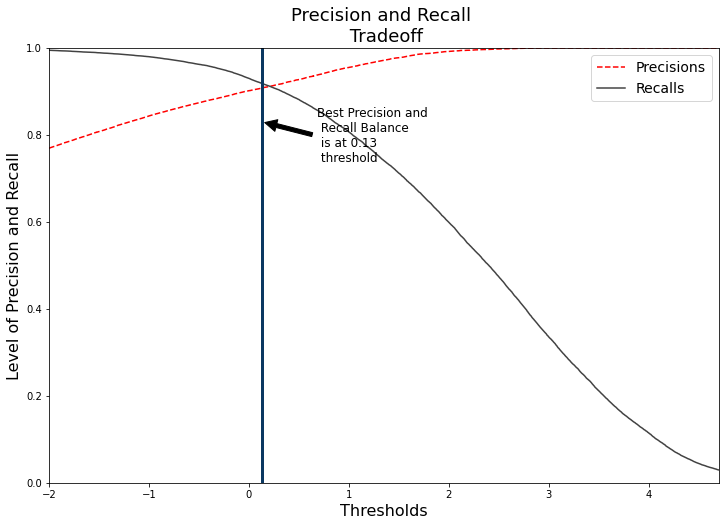

In [49]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

In [50]:
grad_clf.score(X_test, y_test)

ValueError: could not convert string to float: 'Manager'

In [51]:

test = preprocess_pipeline.fit(X, y_train)
test.score(X_test )